# Graded Challenge 7

# Introduction

Name: Samuel Tatang Surja <br>
Batch: HCK-012 <br>
<br>
**Objective**: Develop a neural network model for doing NLP task. The task is to categorize news into certain categories based on text features such as their headline, link, short summary and/or keywords.

# Import Libraries

In [57]:
# base library
import pandas as pd
import numpy as np
import tensorflow as tf

# visualization purpose
import matplotlib.pyplot as plt
import seaborn as sns 

# text preprocessing purpose
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding

# model training and evaluation purpose
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data Loading

I will be using [News Category Dataset](https://www.kaggle.com/datasets/setseries/news-category-dataset) from Kaggle.

In [2]:
data = pd.read_csv('NewsCategorizer.csv')
display(data.head(10))
display(data.tail(10))

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
5,WELLNESS,Bad Love Advice: 9 Lessons To Unlearn,https://www.huffingtonpost.com/entry/bad-love-...,"By Carey Moss for YouBeauty.com Love rom-coms,...",bad-love-advice-from-movies
6,WELLNESS,The Happiest (And Unhappiest) States In The U.S.,https://www.huffingtonpost.com/entry/happiest-...,The nation in general scored a 66.2 in 2011 on...,happiest-state-well-being-united-states-gallup
7,WELLNESS,Seaweed: The Green Superfood You're Not Eating...,https://www.huffingtonpost.com/entry/superfood...,It's also worth remembering that if the water ...,superfood-seaweed-health-benefits
8,WELLNESS,Addicted to Food?,https://www.huffingtonpost.com/entry/food-addi...,"If you look at our culture's eating behavior, ...",food-addiction
9,WELLNESS,High Tech Works When It Enables High Touch,https://www.huffingtonpost.com/entry/high-tech...,"François-Marie Arouet, 18th century French aut...",high-tech-works-when-it-e


,category,headline,links,short_description,keywords
49990,SPORTS,"A Youth Soccer Team Beat Their Opponents, Then...",https://www.huffingtonpost.com/entry/barcelona...,And the video is now going viral.,barcelona-omiya-ardija
49991,SPORTS,"Rafal Lipinski Nails Sick, Complicated Dunk",https://www.huffingtonpost.com/entry/rafal-lip...,"Plenty of air, plenty to do",rafal-lipinski-nails-sick-complicated-dunk
49992,SPORTS,Terrence Ross Dunk Contest Video: Raptors' Roo...,https://www.huffingtonpost.com/entry/terrence-...,"Whether or not Shaq knew him, Ross figures to ...",terrence-ross-dunk-contest-winner-2013-video
49993,SPORTS,Norovirus Outbreak At Winter Olympics Prompts ...,https://www.huffingtonpost.com/entry/norovirus...,Troops will replace hundreds of civilian secur...,norovirus-outbreak-at-winter-olympics-prompts-...
49994,SPORTS,"Tiger Woods And Rory McIlroy, Honda Classic Li...",https://www.huffingtonpost.comhttp://golfweek....,Tiger Woods is looking to springboard off a 5-...,NaN
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN
49999,SPORTS,"Simone Biles Isn't The Next Anyone, She's 'The...",https://www.huffingtonpost.com/entry/the-first...,The gymnast is in a league of her own.,the-first-simone-biles


**Column Understanding**

- category*: A category news article belongs to
- headline: Headline of the news article
- links: urls of the news article
- short_description: brief description about the news article
- keywords: focus keywords used in the url

\**Target Variable*

### Data Transformation

I will in any case use headline and short description as feature to determine the news category. After considering their usefulness to the news context, I decided to drop links and keywords. Links are not very helpful to provide context of the news category, meanwhile although keywords might provide additional contextual information, it is mostly extracted from either the headline or short description so it is kind of redundant information.

In [3]:
data['text'] = data['headline'] + ' ' + data['short_description']
data.head()

,category,headline,links,short_description,keywords,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre..."


In [4]:
data_new = data[['text', 'category']]
data_new.head()

,text,category
0,143 Miles in 35 Days: Lessons Learned Resting ...,WELLNESS
1,Talking to Yourself: Crazy or Crazy Helpful? T...,WELLNESS
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,WELLNESS
3,"Oh, What a Difference She Made If you want to ...",WELLNESS
4,"Green Superfoods First, the bad news: Soda bre...",WELLNESS


Looking good. We will work with this data.

# Exploratory Data Analysis I

**Copy Data**

In [5]:
data_eda = data_new.copy()

### Data Info

In [6]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      50000 non-null  object
 1   category  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


- 50000 rows data
- 1 text feature
- 1 target variable (category)

### Check Missing Values

In [7]:
data_eda.isna().sum()

text        0
category    0
dtype: int64

- no missing values
- we saw some missing values in keywords column before but since we dropped it, all good now

### Target Distribution

<Axes: xlabel='count', ylabel='category'>

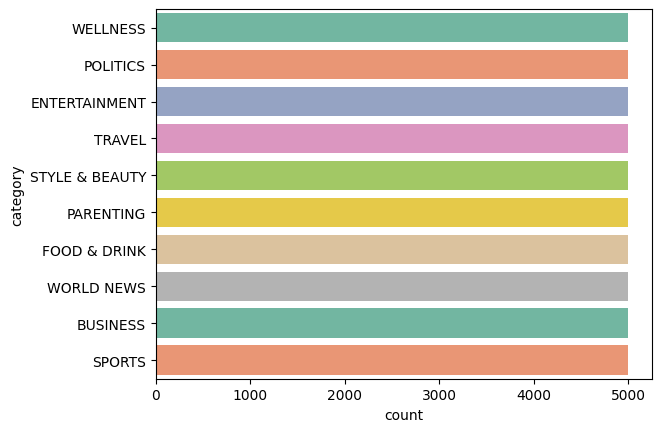

In [8]:
sns.countplot(data=data_eda, y='category', order=data_new['category'].value_counts().index, palette='Set2')

Wow! The target distribution is very balanced.

### Check Duplicates

In [9]:
data_eda.duplicated().sum()

4251

Unfortunately there are duplicate rows. let's see what happen to target distribution if we drop them.

In [10]:
data_eda.drop_duplicates(inplace=True)
data_eda.reset_index(drop=True)
data_eda['category'].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          3091
SPORTS            2658
Name: count, dtype: int64

Hmm, maybe the duplicates was the dataset creator's effort to balance the target variable. let's just keep the duplicates then.

In [11]:
data_eda = data_new.copy()
data_eda['category'].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64

### Text Length Distribution

Let's see how long is each text and how the distribution looks like

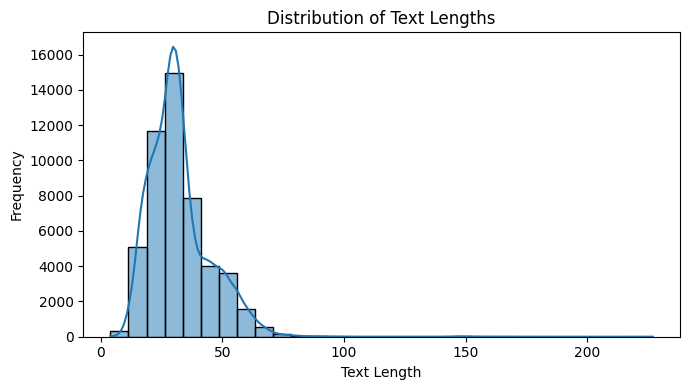

,count,mean,std,min,25%,50%,75%,max
text_len,50000.0,32.33444,13.132873,4.0,24.0,30.0,38.0,227.0


In [14]:
text_len = []

# save each text length into list
for t in data_eda['text']:
    text_len.append(len(t.split()))

# save into dataframe
text_len_df = pd.DataFrame({'text_len':text_len})

# Create a histogram plot using Seaborn
plt.figure(figsize=(7, 4))
sns.histplot(data=text_len_df, x='text_len', bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

text_len_df.describe().T

It seems most text length are about 30s, but there are a few news text that have more than 200 words in it. As text length doesn't provide any information to which category the news falls into, we will not include it as a feature.

# Text Preprocessing

**Copy Data**

In [15]:
data_tp = data_eda.copy()

### Preprocessing

We're going to preprocess the text, clean them so that only important and relevant words are left. We do this to make it easier for the model to learn and make predictions.

In [16]:
# initialize necessary packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# set stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CIEL_W\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CIEL_W\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CIEL_W\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# define function to preprocess text
def preprocess_text(text):
    # Case folding
    words = text.lower()
    # Mention removal
    words = re.sub("@[A-Za-z0-9_]+", " ", text)
    # Hashtags removal
    words = re.sub("#[A-Za-z0-9_]+", " ", text)
    # Newline removal (\n)
    words = re.sub(r"\\n", " ",text)
    # Whitespace removal
    words = text.strip()
    # URL removal
    words = re.sub(r"http\S+", " ", text)
    words = re.sub(r"www.\S+", " ", text)
    # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
    words = re.sub("[^A-Za-z\s']", " ", text)

    # tokenize text
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # join the words back into a single string
    return ' '.join(tokens)

In [18]:
data_tp['text'] = data_tp['text'].apply(preprocess_text)

In [19]:
data_tp.head()

,text,category
0,143 Miles 35 Days : Lessons Learned Resting pa...,0
1,Talking Yourself : Crazy Crazy Helpful ? Think...,0
2,Crenezumab : Trial Will Gauge Whether Alzheime...,0
3,"Oh , What Difference She Made If want busy , k...",0
4,"Green Superfoods First , bad news : Soda bread...",0


Text successfully cleaned and preprocessed

### Data Split

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data_tp['text'], data_tp['category'], stratify=data_tp['category'], test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.15, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(36125,)
(6375,)
(7500,)


Here we have a choice, we can do OneHotEncoding on the target variable and use Categorical Cross Entropy loss function, or convert them to sparse matrix and use Sparse Categorical Cross Entropy loss function. <br>
I find one hot encoding method is more reliable when dealing with multiclass categorization task. <br>
Let's OneHotEncode the target sets

In [21]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Text Vectorization

Computer understands number better than text, so we will vectorize the text. Beside making it easier for computer to understand, it is also a form of dimensionality reduction which is useful for conserving memory.

In [39]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<36125x42548 sparse matrix of type '<class 'numpy.int64'>'
	with 751416 stored elements in Compressed Sparse Row format>

In [40]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  42548
Maximum Sentence Length :  175 tokens


In [41]:
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [42]:
# show top 20 most frequently used words
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'the',
 's',
 'i',
 'to',
 'in',
 'a',
 'nt',
 'of',
 'and',
 'for',
 'it',
 'new',
 'one',
 'you',
 'is',
 'photos',
 'with',
 'year']

### Embedding

Embedding is used in natural language processing tasks to convert sequences of integers (representing words or tokens) into dense vectors of fixed size. We talked before about how computers read number better than text.

In [26]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Let's see the result of what we've done so far

In [43]:
## Document example
print('Document example')
print(data_tp['text'][0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data_tp['text'][0]]))
print('Vector size : ', text_vectorization([data_tp['text'][0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data_tp['text'][0]])))
print('Vector size : ', embedding(text_vectorization([data_tp['text'][0]])).shape)

Document example
143 Miles 35 Days : Lessons Learned Resting part training . I 've confirmed I sort already knew : I 'm built running streak . I 'm built hard workout three five day week lot cross training , physical therapy foam rolling . But I 've also confirmed I 'm stubborn .

Result of Text Vectorization
tf.Tensor(
[[17343  4524  2999   912  1080   628 12182   131  1077     4    70  2335
      4  1689   361   861     4   129  2063   770  5604     4   129  2063
    237  1215   185   299    21    42   235  3483  1077  1690  2348 14319
   3514    36     4    70    93  2335     4   129 10969     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     

# Model Base

### Model Definition & Training

As our base model we use simple sequential ANN structure with 1 hidden layer. We use LSTM for NLP

In [44]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dense(10, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)]

# Model Training
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, batch_size=64, epochs=20, validation_data=(X_val, y_val_ohe), callbacks=callbacks)

Epoch 1/20
565/565 [==============================] - 72s 123ms/step - loss: 2.3042 - accuracy: 0.0967 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 2/20
565/565 [==============================] - 71s 125ms/step - loss: 2.3033 - accuracy: 0.1016 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 3/20
565/565 [==============================] - 77s 136ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 4/20
565/565 [==============================] - 65s 114ms/step - loss: 2.3031 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 5/20
565/565 [==============================] - 73s 129ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/20
565/565 [==============================] - 65s 114ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0999


### Model Evaluation

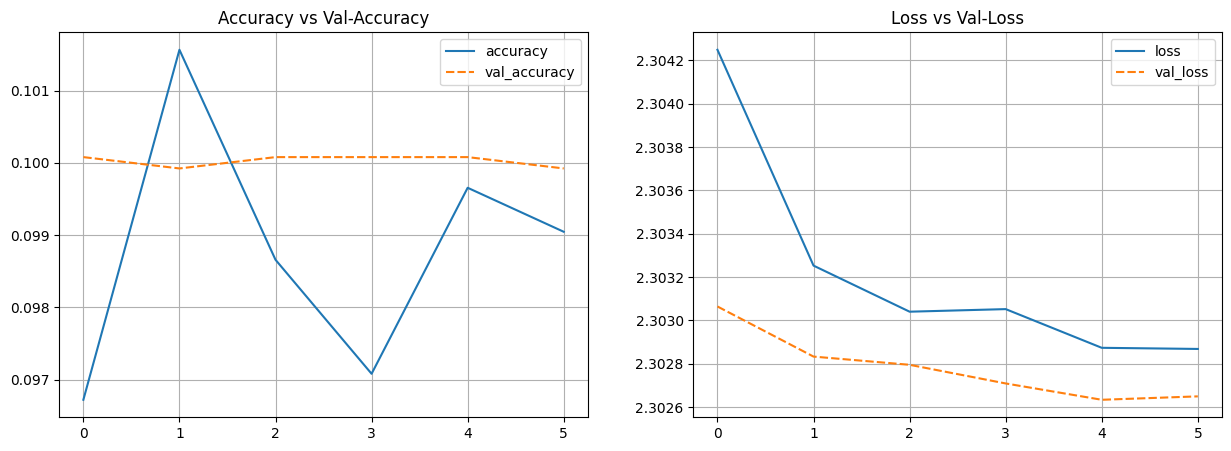

In [45]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Model performs quite consistently at 10% accuracy which is very bad. this might be due to overly simple structure and batch size. lowering the batch size, using dropout and trying out different structure or algorithm may increase model's performance.

# Model Improved

### Model Definition and Training

In [51]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization)
model_lstm_2.add(embedding)
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(10, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)]

# Model Training
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, batch_size=32, epochs=20, validation_data=(X_val, y_val_ohe), callbacks=callbacks)

Epoch 1/20
1129/1129 [==============================] - 267s 228ms/step - loss: 0.3394 - accuracy: 0.9303 - val_loss: 0.9856 - val_accuracy: 0.7736
Epoch 2/20
1129/1129 [==============================] - 299s 265ms/step - loss: 0.0545 - accuracy: 0.9886 - val_loss: 1.0519 - val_accuracy: 0.7851
Epoch 3/20
1129/1129 [==============================] - 249s 220ms/step - loss: 0.0258 - accuracy: 0.9947 - val_loss: 1.1956 - val_accuracy: 0.7744
Epoch 4/20
1129/1129 [==============================] - 230s 204ms/step - loss: 0.0142 - accuracy: 0.9972 - val_loss: 1.3070 - val_accuracy: 0.7766
Epoch 5/20
1129/1129 [==============================] - 229s 203ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 1.3530 - val_accuracy: 0.7715
Epoch 6/20
1129/1129 [==============================] - 226s 200ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 1.3213 - val_accuracy: 0.7768
Epoch 7/20
1129/1129 [==============================] - 233s 206ms/step - loss: 0.0071 - accuracy: 0.9986 - val_

### Model Evaluation

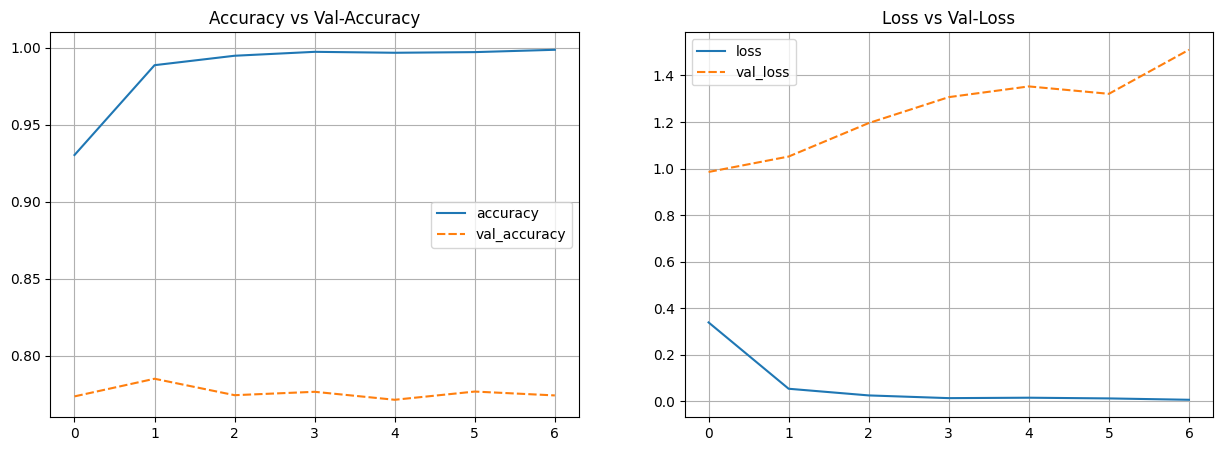

In [52]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Looking from the accuracy vs. val-accuracy graph alone, it's obvious the tuned model performs much better than the base one. let's evaluate it's performance on the test set and compare them

In [54]:
print(model_lstm_2.evaluate(X_train, y_train_ohe))
print(model_lstm_2.evaluate(X_val, y_val_ohe))
print(model_lstm_2.evaluate(X_test, y_test_ohe))

1129/1129 [==============================] - 47s 41ms/step - loss: 0.0167 - accuracy: 0.9975
[0.016725387424230576, 0.9974809885025024]
200/200 [==============================] - 9s 43ms/step - loss: 1.0519 - accuracy: 0.7851
[1.0519049167633057, 0.7850980162620544]
235/235 [==============================] - 10s 42ms/step - loss: 1.0649 - accuracy: 0.7744
[1.0649309158325195, 0.774399995803833]


77% accuracy. it's still considered overfit, but it's score is not bad.

# Model Saving

Let's save our model for inference and deployment

In [56]:
model_lstm_2.save('model.keras')
model_lstm_2.save('model.H5')

INFO:tensorflow:Assets written to: model.H5\assets


INFO:tensorflow:Assets written to: model.H5\assets


# Conclusion

*Model Analysis*
- base model doesn't perform well, but after some tuning the performance increase significantly
- model stil overfits, further adjustment to learning rate and dropout may improve model performance
<br><br>

*Overall Analysis*
- Dataset used was very balanced, we left some duplicates to keep it that way
<br><br>

*Improvement Ideas*
- During text preprocessing some stopwords still don't get recognized and cleaned, improvement or update to stopwords list may help the model to learn better
<br><br>

*Business Impact*
- Accurate news categorization can efficiently filter and access relevant information
- Analyzing news trends may provide insights to improve marketing strategy
- Accurate categorization also enables businesses to assess potential risk and prevent loss